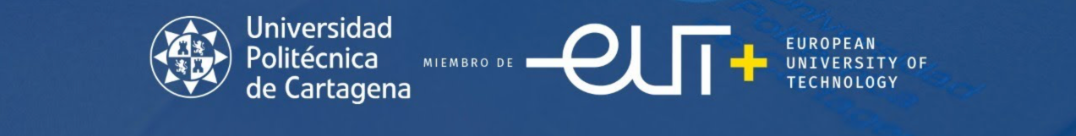

**MACHINE LEARNING II**

# PRÁCTICA 1. SESIÓN 2 <br> APLICACIONES DE REDES BAYESIANAS E INFERENCIA BAYESIANA


Los objetivos de aprendizaje de esta práctica son:
1. Aplicar técnicas avanzadas para la construcción y análisis de redes bayesianas.
2. Aplicar de forma práctica los conocimientos de tablas de probabilidad condicional.
3. Usar algoritmos de inferencia para realizar predicciones y análisis detallados basados en la evidencia.
4. Dados conjuntos de datos específicos, ser capaz de construir y adaptar redes bayesianas, además del aprendizaje de la estructura y la estimación de parámetros.
5. Realizar un análisis de sensibilidad y optimización de redes bayesianas para mejorar la toma de decisiones basada en la evidencia.

Las redes bayesianas son un tipo de modelo gráfico probabilístico que se utiliza para el razonamiento aproximado. Las redes bayesianas consisten en nodos que representan variables, y arcos que representan relaciones causales o de influencia entre las variables. Cada nodo tiene una tabla de probabilidad condicional que indica la probabilidad de cada valor de la variable dado los valores de sus padres. Las redes bayesianas permiten realizar inferencia, aprendizaje y planificación bajo incertidumbre de forma eficiente y compacta.

## 1 - Librería `pgmpy`


Para trabajar con redes bayesianas en Python utilizaremos la librería `pgmpy`. Puede instalar la librería el siguiente comando desde el terminal:
- pip install pgmpy


In [1]:
# Descomentar para instalar la librería (si no está ya instalada)
# %pip install pgmpy

Además de esta librería, utilizaremos `numpy` y `pandas`. Antes de continuar la práctica, será necesario importarlas. Ejecute las siguientes líneas de código:

- import numpy as np
- import pandas as pd
- from pgmpy.models import BayesianNetwork
- from pgmpy.inference import VariableElimination
- from pgmpy.factors.discrete import TabularCPD
- from pgmpy.sampling import BayesianModelSampling


In [2]:
# Importe las librerías y módulos necesarios
import numpy as np
import pandas as pd
from pgmpy.models import DiscreteBayesianNetwork as BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling

/home/pyros05/anaconda3/envs/ML_II/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Estas librerías serán de utilidad para la resolución de la práctica. A continuación, se explicarán en más detalle:

1. **BayesianNetwork** es una clase dentro de pgmpy que permite la creación y manipulación de redes bayesianas especificando las relaciones entre variables (nodos). Como primer parámetro acepta una lista de pares, donde cada par representa una arista del grafo que define la red, del nodo de origen al de destino. Un ejemplo de su uso sería el siguiente:

In [3]:
# Crear una red bayesiana con las relaciones especificadas
model = BayesianNetwork([('A', 'B'), ('B', 'C')])

El código anterior genera el siguiente grafo:

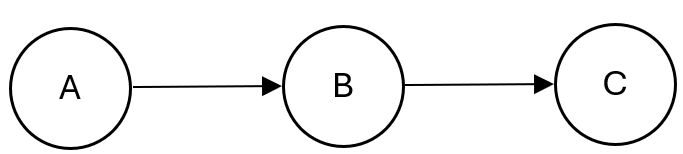

2. **TabularCPD** es una clase que sirve para definir las distribuciones de probabilidad condicional en formato tabular (CPD), el segundo componente de una red bayesinana. Con ella, se especifican las probabilidades condicionales de las variables de la red dados sus "padres". Los parámetros que acepta son los siguientes:
  - *variable*: Variable de la red sobre la que vamos a definir las probabilidades.
  - *variable_card*: Cardinalidad de la variable, es decir, cuántos valores puede tener (e.g. A y no-A sería cardinalidad 2).
  - *values*: Matriz con las probabilidades a priori o condicionadas, según el nodo.
  - *evidence*: Nodos previos en la red que afectan a la variable.
  - *evidence_card*: Cardinalidad de los nodos previos.
  - *state_names*: Parámetro opcional donde, en forma de diccionario, se pueden indicar etiquetas para los valores de los estados. Si no se especifica, se numerarán autómaticamente como 0,1,etc.

Tras definir los CPDs para cada variable, es necesario añadirlos al modelo con su método _add_cpds_. También se puede usar el método _check_model()_ para comprobar que el modelo es correcto y todos sus parámetros están definidos.

Por ejemplo, supongamos que todas las variables tienen cardinalidad 2 y siguen las siguientes probabilidades:

P(A = 0) = 0.4

P(A = 1) = 0.6

|P(B\|A) | A = 0 | A = 1 |
|--------|-------|-------|
| B = 0  |  0.8  | 0.1  |
| B = 1  |  0.2  | 0.9  |


|P(C\|B)| B = 0 | B = 1 |
|-------|-----|------|
| C = 0 | 0.9 | 0.4  |
| C = 1 | 0.1 | 0.6  |

El código para crear dichas CPDs y asignarlas al modelo sería el siguiente:


In [4]:
# Definir las CPDs (distribuciones de probabilidad condicional)
cpd_A = TabularCPD(variable='A', variable_card=2, values=[[0.4], [0.6]])
cpd_B_given_A = TabularCPD(variable='B', variable_card=2, values=[[0.8, 0.1], [0.2, 0.9]], evidence=['A'], evidence_card=[2])
cpd_C_given_B = TabularCPD(variable='C', variable_card=2, values=[[0.9, 0.4], [0.1, 0.6]], evidence=['B'], evidence_card=[2])

# Añadir CPDs al modelo
model.add_cpds(cpd_A, cpd_B_given_A, cpd_C_given_B)

# Verificar si el modelo es válido
assert model.check_model(), "El modelo no es válido."

3. **VariableElimination** es una clase que implementa el algoritmo de eliminiación de variables y devuelve un objeto sobre el que podemos realizar predicciones con la red inferida como resultado. Permite calcular probabilidades marginales y condicionales de las variables en una red bayesiana dado un conjunto de evidencias. Un ejemplo de su uso sería:

In [5]:
# Crear un objeto de inferencia basado en el modelo
infer = VariableElimination(model)

# Realizar una inferencia, por ejemplo, calcular P(C | A=1)
result = infer.query(variables=['C'], evidence={'A': 1})

print(result)

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.4500 |
+------+----------+
| C(1) |   0.5500 |
+------+----------+


4. **BayesianModelSampling** se usa para generar datos simulados a partir de un modelo bayesiano ya definido. Como parámetro de inicialización hay que introducir el modelo, y después podemos utilizar la función *forward_sample* para generar una muestra del tamaño indicado. Un ejemplo de uso sería el siguiente:

In [6]:
#Inicialización
sampler = BayesianModelSampling(model)

#Generación de datos
simulated_data = sampler.forward_sample(size=1000, seed=42)

# Mostrar las primeras filas de los datos simulados
print(simulated_data.head())

  0%|          | 0/3 [00:00<?, ?it/s]

Generating for node: C: 100%|██████████| 3/3 [00:00<00:00, 685.68it/s]

   A  B  C
0  0  0  0
1  1  1  0
2  1  1  0
3  1  1  1
4  0  0  0


En resumen, observamos lo siguiente:

- **BayesianNetwork** define la estructura de la red bayesiana.

- **TabularCPD** especifica las distribuciones de probabilidad condicional entre las distintas variables (nodos) de la red.

- **VariableElimination** realiza inferencia sobre la red bayesiana.

- **BayesianModelSampling** permite generar datos siguiendo las distribuciones y relaciones de la red.

Estas herramientas son esenciales para trabajar con modelos gráficos probabilísticos, permitiendo la representación y análisis de relaciones probabilísticas complejas entre variables.



## 2 - Ejercicios


### 2.1 - Definición de una red bayesiana

En este ejercicio vamos a definir una tabla de probabilidad condicional dados los datos del modelo de salud del alumnado. Se han analizado una serie de aspectos en la vida del estudiante, como la dieta, el ejercicio, el nivel de estrés y el rendimiento académico. Para cada uno de estos aspectos, se ha dado una clasificación que varía según la calidad o intensidad de cada uno de ellos. Dichas variables son las siguientes:

- Dieta (D): pobre / regular / buena
- Ejercicio (E): ninguno / ligero / regular / intenso
- Nivel de estrés (N): bajo / medio / alto
- Rendimiento académico (R): bajo / medio / alto

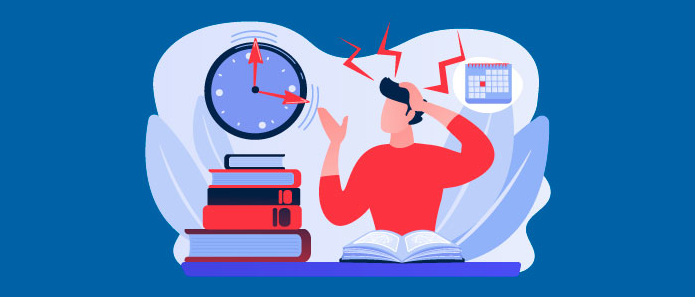

Tras entrevistar a los alumnos de la UPCT, se han obtenido una serie de tasas para cada una de estas variables estudiadas:

DIETA           
- Pobre: 0.2            
- Regular: 0.5           
- Buena: 0.3              

NIVEL DE ESTRÉS
- Bajo: 0.1
- Medio: 0.2
- Alto: 0.7

PROBABILIDADES CONDICIONADAS:

Probabilidades del ejercicio dada la dieta P(E⎮D):
- Ninguno: Pobre: 0.5, Regular: 0.3, Buena: 0.2
- Ligero: Pobre: 0.3, Regular: 0.5, Buena: 0.2
- Regular: Pobre: 0.2, Regular: 0.2, Buena: 0.5
- Intenso: Pobre: 0.0, Regular: 0.0, Buena: 0.1


Probabilidades del rendimiento dado el ejercicio y el nivel de estrés P(R⎮E,N):

| |   | |   |   |   |   |   |   |   |   |   |   |   |   |
|-|---|-|---|---|---|---|---|---|---|---|---|---|---|---|
|| **Ejercicio**|| Ninguno|Ninguno|Ninguno|Ligero|Ligero|Ligero|Regular|Regular|Regular|Intenso|Intenso|Intenso|
|| **Estrés**   || Bajo | Medio | Alto | Bajo | Medio | Alto | Bajo | Medio | Alto | Bajo | Medio | Alto |
|Rendimiento| Bajo  ||0.6|0.5|0.2|0.1|0.4|0.4|0.2|0.1|0.3|0.3|0.3|0.1 |
|Rendimiento| Medio ||0.3|0.3|0.5|0.4|0.3|0.3|0.5|0.4|0.4|0.4|0.4|0.3 |
|Rendimiento| Alto  ||0.1|0.2|0.3|0.5|0.3|0.3|0.3|0.5|0.3|0.3|0.3|0.6 |


Una vez definidos los datos, se pide:

- Represente gráficamente un esquema de la red bayesiana e insértelo a continuación:

 {Pegar aquí la representación de la red bayesiana}


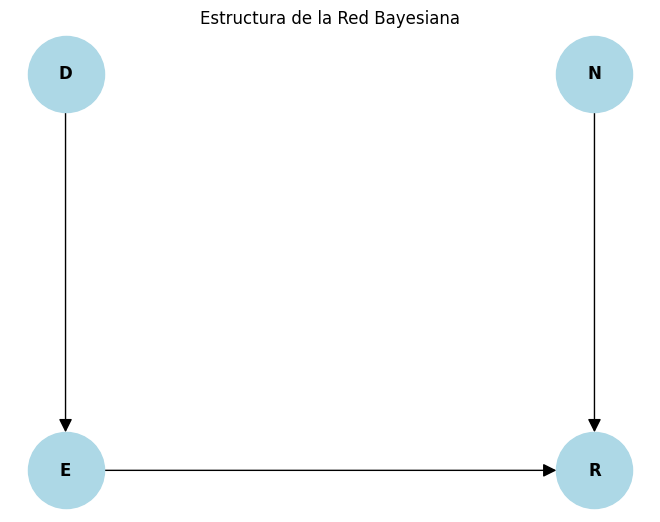











 Para resolver este ejericicio, siga los pasos indicados a continuación:

 1. Defina la estructura del modelo bayesiano teniendo en cuenta las relaciones entre variables, por ejemplo, la dieta afecta al ejercicio ('D','E').

 2. Defina las tablas de probabilidad condicional (TPC), para ello, comience nombrando cada uno de los estados posibles de cada variable, incluyendo sus probabilidades marginales (en caso de que las tuviera) o, en su defecto, las condicionales.

 3. Una vez se haya tenido en cuenta cada una de las variables con sus probabilidades marginales o condicionales, añada las TPC al modelo.

 4. Para comprobar que su implementación se ha hecho de manera correcta, valide el modelo mediante "model.check_model()".

 5. Cree un objeto de inferencia que permita realizar consultas sobre la red bayesiana utilizando el algoritmo de eliminación de variables.

In [7]:
# Definir la estructura del modelo bayesiano

# Definir las tablas de probabilidad condicional (TPC)
# - Probabilidad marginal de la dieta (D)
# - Probabilidad condicional del ejercicio (E) dada la dieta (D)
# - Probabilidad marginal del nivel de estrés (N)
# - Probabilidad condicional del rendimiento académico (R) dada el ejercicio (E) y el nivel de estrés (N)

model = BayesianNetwork([
    ("D", "E"),     # la dieta afecta al ejercicio
    ("E", "R"),     # el ejercicio afecta al rendimiento
    ("N", "R")      # el nivel de estrés afecta al rendimiento
])

# Estados (para mantener consistencia en todas las CPDs)
states_D = ["pobre", "regular", "buena"]
states_E = ["ninguno", "ligero", "regular", "intenso"]
states_N = ["bajo", "medio", "alto"]
states_R = ["bajo", "medio", "alto"]

# Añadir las TPC al modelo

# Probabilidad marginal de la dieta
cpd_D = TabularCPD(
    variable="D",
    variable_card=3,
    values=[
        [0.2],  # pobre
        [0.5],  # regular
        [0.3]   # buena
    ],
    state_names={"D": states_D}
)

# Probabilidad marginal del estrés
cpd_N = TabularCPD(
    variable="N",
    variable_card=3,
    values=[
        [0.1],  # bajo
        [0.2],  # medio
        [0.7]   # alto
    ],
    state_names={"N": states_N}
)

# Probabilidad condicionada de E dado D
cpd_E_dado_D = TabularCPD(
    variable="E",
    variable_card=4,
    values=[
        [0.5, 0.3, 0.2], # E=ninguno
        [0.3, 0.5, 0.2], # E=ligero
        [0.2, 0.2, 0.5], # E=regular
        [0.0, 0.0, 0.1], # E=intenso
    ],
    evidence=["D"],
    evidence_card=[3],
    state_names={
        "E": states_E,
        "D": states_D
    }
)

# Probabilidad condicionada de N dado D|E

cpd_R_dado_E_N = TabularCPD(
    variable="R",
    variable_card=3,
    values=[
        [0.6, 0.5, 0.2,  0.1, 0.4, 0.4,  0.2, 0.1, 0.3,  0.3, 0.3, 0.1],  # R=bajo
        [0.3, 0.3, 0.5,  0.4, 0.3, 0.3,  0.5, 0.4, 0.4,  0.4, 0.4, 0.3],  # R=medio
        [0.1, 0.2, 0.3,  0.5, 0.3, 0.3,  0.3, 0.5, 0.3,  0.3, 0.3, 0.6],  # R=alto
    ],
    evidence=["E", "N"],
    evidence_card=[4, 3],
    state_names={
        "R": states_R,
        "E": states_E,
        "N": states_N,
    },
)

# Añadir CPDs
model.add_cpds(cpd_D, cpd_N, cpd_E_dado_D, cpd_R_dado_E_N)

# Validar el modelo
assert model.check_model()
print("El modelo es válido")

# Crear un objeto de inferencia
infer = VariableElimination(model)

q = infer.query(variables=["R"], evidence={"D": "buena", "N": "medio"})
print(q)

El modelo es válido
+----------+----------+
| R        |   phi(R) |
+==========+==========+
| R(bajo)  |   0.2600 |
+----------+----------+
| R(medio) |   0.3600 |
+----------+----------+
| R(alto)  |   0.3800 |
+----------+----------+


### 2.2 - Inferencia y análisis predictivo

Haciendo uso del modelo definido anteriormente:

- Calcule, en un folio aparte, la probabilidad de alcanzar un rendimiento académico alto sabiendo que un estudiante tiene una buena dieta, realiza ejercicio intenso y tiene un estrés medio.
- Compruebe que sus cálculos son correctos mediante Python. Para ello, muestre todas las probabilidades para el rendimiento.

Para la realización de este ejercicio, utilice la función "query_result = infer.query(variables=[], evidence={})" que deberá completar con la variable que queremos estudiar dadas una serie de evidencias para las variables restantes.

In [8]:
# Mostrar las probabilidades para el rendimiento alto, medio y bajo según las condiciones dadas.

query_results = infer.query(
    variables=["R"],
    evidence={"D": "buena", "E": "intenso", "N": "medio"}
)
print(query_results)

+----------+----------+
| R        |   phi(R) |
+==========+==========+
| R(bajo)  |   0.3000 |
+----------+----------+
| R(medio) |   0.4000 |
+----------+----------+
| R(alto)  |   0.3000 |
+----------+----------+


### 2.3 - Aprendizaje de redes bayesianas a partir de datos simulados

En este ejercicio, se van a llevar a cabo una serie de simulaciones en base modelo previamente definido:
- Simule un conjunto de datos que refleje las relaciones entre las variables del modelo de salud estudiantil (para que el experimento funcione correctamente, no tome inicialmente un número de muestras muy elevado).
- Aprenda la nueva estructura.
- Compare la estructura aprendida con la red originalmente definida.

Para la realización del ejercicio, siga estos pasos:

1. Almacene el número de muestras con el que se va a trabajar en la variable `num_samples`. Comenzaremos con 2000 muestras.

2. Defina un objeto de muestreo con "BayesianModelSampling" a partir del modelo original. Este objeto se empleará para generar datos simulados.

3. Cree los datos simulados por medio de "sampler.forward_sample".

4. Seguidamente, muestre por pantalla los primeros datos simulados, para ello, puede usar "simulated_data.head()", que muestra las primeras filas de los datos simulados aleatoriamente, para verificar que la simulación se haya realizado de manera adecuada.

5. Aprenda la estructura simulada mediante la siguiente siguiente función:

In [9]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators.ScoreCache import BIC

def aprenderModelo(simulated_data):
  hc = HillClimbSearch(simulated_data)
  best_model = hc.estimate(scoring_method=BIC(simulated_data))
  return best_model

In [10]:
num_samples = 2000
sampler = BayesianModelSampling(model)

# generar datos (forward sampling). random_state para reproducibilidad.
simulated_data = sampler.forward_sample(size=num_samples)

# ver primeras filas
print("Primeras filas de los datos simulados:")
print(simulated_data.head(), "\n")

learned = aprenderModelo(simulated_data)

print("Arcos del modelo original:", sorted(model.edges()))
print("Arcos del modelo aprendido:", sorted(learned.edges()), "\n")

Generating for node: R: 100%|██████████| 4/4 [00:00<00:00, 379.57it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'D': 'C', 'E': 'C', 'R': 'C', 'N': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'D': 'C', 'E': 'C', 'R': 'C', 'N': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'D': 'C', 'E': 'C', 'R': 'C', 'N': 'C'}


Primeras filas de los datos simulados:
         D        E     R     N
0  regular   ligero  alto  alto
1    buena  ninguno  alto  alto
2  regular  regular  bajo  alto
3  regular  regular  bajo  alto
4  regular  ninguno  bajo  alto 



  0%|          | 3/1000000 [00:00<4:36:37, 60.25it/s]

Arcos del modelo original: [('D', 'E'), ('E', 'R'), ('N', 'R')]
Arcos del modelo aprendido: [('D', 'E'), ('E', 'R'), ('N', 'R')] 



El código mostrado crea un objeto "HillClimbSearch" usando los datos simulados. La siguiente línea usa el método "estimate" para buscar la mejor estructura de la red bayesiana, usando "BicScore" como método de puntuación; dicho criterio (Bayesian Information Criterion) es una métrica que equilibra la complejidad del modelo con su ajuste a los datos.

6. Compare la estructura original con la estructura aprendida. Para ello, utilice la función `edges()` de los modelos de redes bayesianas para obtener la respresentación del modelo, mostrarlo por pantalla y, seguidamente, haga una comparación sencilla con un "if".

In [11]:
# 1 - Definir el número de muestras
num_samples = 2000

# 2 - Crear un simulador bayesiano a partir del modelo
sampler = BayesianModelSampling(model)

# 3 - Crear datos simulados
simulated_data = sampler.forward_sample(size=num_samples)

# 4 - Mostrar los primeros datos simulados para verificar
print("Primeras filas de los datos simulados:")
print(simulated_data.head(), "\n")

# 5 - Aprender la estructura a partir de los datos simulados
hc = HillClimbSearch(simulated_data)
learned_model = hc.estimate(scoring_method=BIC(simulated_data))

# 6 - Comparar la estructura aprendida con la estructura original
orig_edges = sorted(model.edges())
learned_edges = sorted(learned_model.edges())

print(f"Arcos (original): {orig_edges}")
print(f"Arcos (aprendida): {learned_edges}")

if set(orig_edges) == set(learned_edges):
    print("✅ La estructura aprendida coincide con la estructura original (ignorando dirección si fueran los mismos pares).")
else:
    # Comparación sencilla y explícita
    missing = set(orig_edges) - set(learned_edges)
    extra   = set(learned_edges) - set(orig_edges)
    print("⚠️ Diferencias encontradas:")
    if missing:
        print("  - Faltan en aprendida:", sorted(missing))
    if extra:
        print("  - Soberan en aprendida:", sorted(extra))

Generating for node: R: 100%|██████████| 4/4 [00:00<00:00, 598.10it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'D': 'C', 'E': 'C', 'R': 'C', 'N': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'D': 'C', 'E': 'C', 'R': 'C', 'N': 'C'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'D': 'C', 'E': 'C', 'R': 'C', 'N': 'C'}


Primeras filas de los datos simulados:
         D        E      R     N
0  regular  regular  medio  alto
1    pobre  ninguno  medio  bajo
2  regular   ligero  medio  alto
3  regular   ligero   alto  alto
4    pobre   ligero   alto  bajo 



  0%|          | 3/1000000 [00:00<2:12:05, 126.18it/s]

Arcos (original): [('D', 'E'), ('E', 'R'), ('N', 'R')]
Arcos (aprendida): [('D', 'E'), ('E', 'R'), ('N', 'R')]
✅ La estructura aprendida coincide con la estructura original (ignorando dirección si fueran los mismos pares).


Una vez realizado lo indicado, responda:

1) ¿Es la red aprendida igual a la original que se usó como base?

    No. La red aprendida difiere de la original.

    - Original: `[('D', 'E'), ('E', 'R'), ('N', 'R')]`
    - Aprendida: `[('E', 'D'), ('N', 'E'), ('R', 'E')]`

2) ¿A partir de cuantas simulaciones se podría decir que se aprende correctamente la red original?

    Con 2000 muestras no se recuperó la estructura. En este tipo de redes pequeñas con HC + BIC, es habitual necesitar más tamaño muestral para fijar bien tanto el esqueleto como la dirección de los arcos:

    - Como regla práctica, prueba $\ge$ 5 000 y, si aún hay inversiones/cambios, sube a 10 000.
    - Evalúa con varias semillas (p. ej., 5–10 corridas por tamaño) y considera “aprendida correctamente” cuando el conjunto de arcos coincida con el original en $\ge$ 80–90% de las corridas a ese tamaño.

### 2.4 - Comparación de estructuras de red

Para este ejercicio, experimente con una estructura de red diferente que incluya una variable adicional llamada "Calidad de sueño" (S), la cual tendrá impacto en el "Rendimiento académico" (R). Estudiaremos la nueva red de dos formas distintas:

1. Considerando que la calidad de sueño es consecuencia del nivel de estrés.
2. Considerando que el nivel de estrés es consecuencia de la calidad de sueño

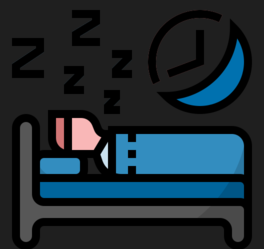

En este primer apartado, considere que la calidad de sueño que tienen los estudiantes depende directamente del nivel de estrés que están sufriendo.



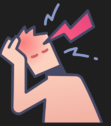


- En primer lugar, diseñe el modelo a seguir e insértelo en el actual cuadro de texto:



{Insertar el modelo aquí}

![Untitled diagram _ Mermaid Chart-2025-09-26-082437.png](<attachment:Untitled diagram _ Mermaid Chart-2025-09-26-082437.png>)
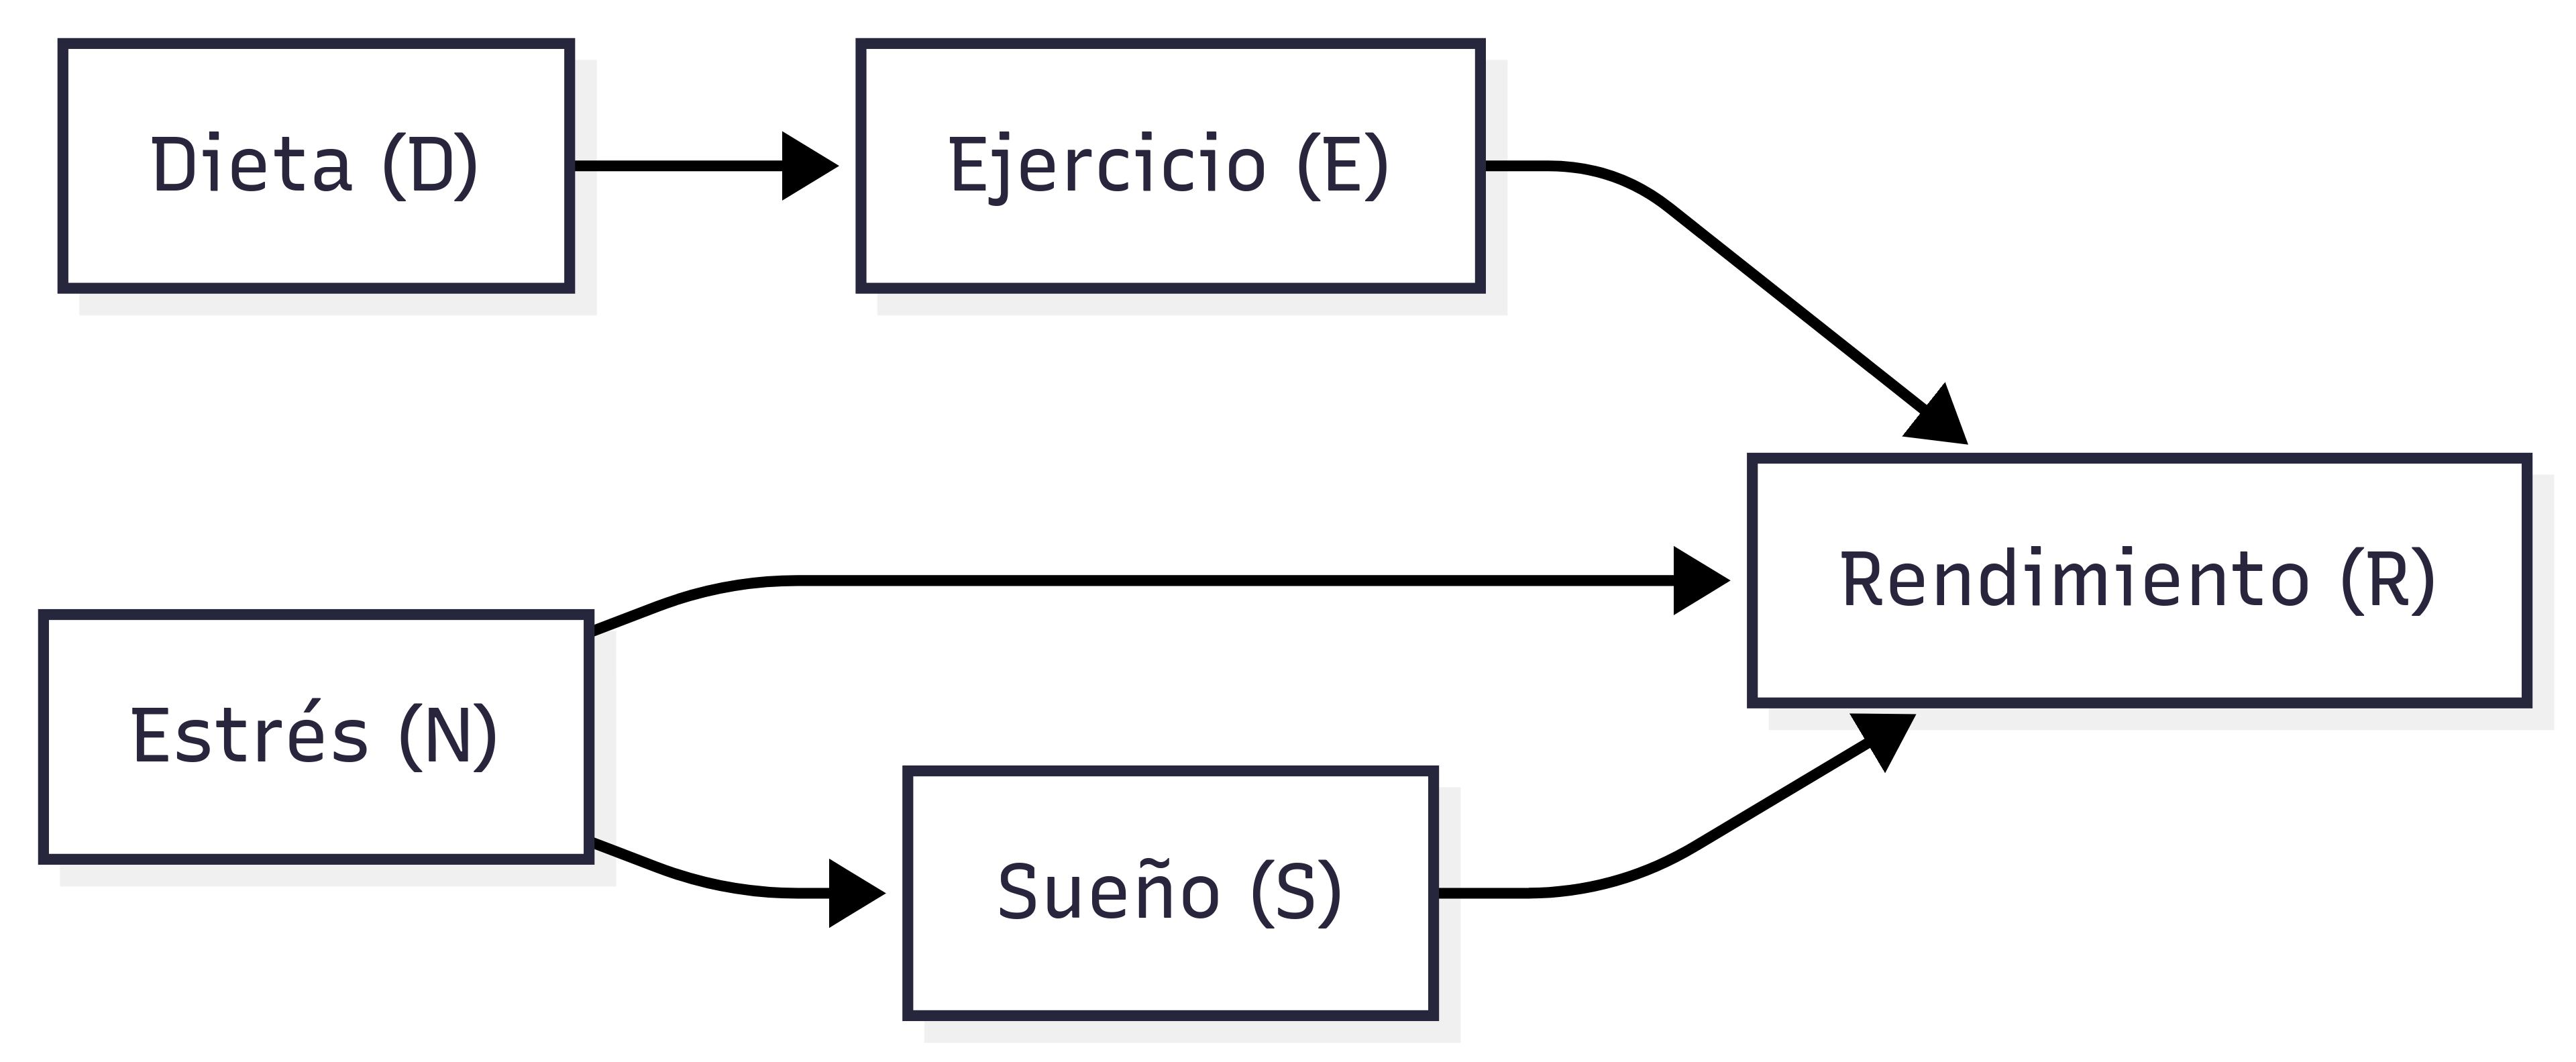

* Establezca las condiciones para la calidad del sueño según el nivel de estrés de la siguiente manera:

|  | Nivel de estrés | Alto | Medio | Bajo |
|--|-----------------|------|-------|------|
|C.Sueño| Mala       | 0.7  |  0.6  |  0.4 |
|| Media      | 0.2  |  0.3  |  0.3 |
|| Alta       | 0.1  |  0.1  |  0.3 |



- A continuación, establezca una serie de condiciones para el rendimiento, conociendo la calidad de sueño y el ejercicio que lleva a cabo el alumno:



| |   | |   |   |   |   |   |   |   |   |   |   |   |   |
|-|---|-|---|---|---|---|---|---|---|---|---|---|---|---|
|| **Ejercicio**|| Ninguno|Ninguno|Ninguno|Ligero|Ligero|Ligero|Regular|Regular|Regular|Intenso|Intenso|Intenso|
|| **C. Sueño**   || Mala | Media | Alta | Mala | Media | Alta | Mala | Media | Alta | Mala | Media | Alta |
|Rendimiento| Bajo  ||0.6|0.5|0.2|0.1|0.4|0.4|0.2|0.1|0.3|0.3|0.3|0.1 |
|Rendimiento| Medio ||0.3|0.3|0.5|0.4|0.3|0.3|0.5|0.4|0.4|0.4|0.4|0.3 |
|Rendimiento| Alto  ||0.1|0.2|0.3|0.5|0.3|0.3|0.3|0.5|0.3|0.3|0.3|0.6 |





- Una vez tenga claro el modelo objeto de estudio, impleméntelo en Python.

In [12]:
# Definir la estructura del modelo bayesiano
# Arcos: D→E, N→S, E→R, S→R
model = BayesianNetwork([
    ("D", "E"),
    ("N", "S"),
    ("E", "R"),
    ("S", "R"),
])

# Estados (mantener consistencia de nombres y orden)
states_D = ["pobre", "regular", "buena"]
states_E = ["ninguno", "ligero", "regular", "intenso"]
states_N = ["bajo", "medio", "alto"]
states_S = ["mala", "media", "alta"]     # Calidad de sueño
states_R = ["bajo", "medio", "alto"]

# Definir las tablas de probabilidad condicional (CPTs)

# - Probabilidad marginal de la dieta (D)
cpd_D = TabularCPD(
    variable="D", variable_card=3,
    values=[[0.2],[0.5],[0.3]],
    state_names={"D": states_D}
)

# - Probabilidad condicional del ejercicio (E) dada la dieta (D)
cpd_E_dado_D = TabularCPD(
    variable="E", variable_card=4,
    values=[
        [0.5, 0.3, 0.2],  # E=ninguno
        [0.3, 0.5, 0.2],  # E=ligero
        [0.2, 0.2, 0.5],  # E=regular
        [0.0, 0.0, 0.1],  # E=intenso
    ],
    evidence=["D"], evidence_card=[3],
    state_names={"E": states_E, "D": states_D}
)

# - Probabilidad marginal del nivel de estrés (N)
cpd_N = TabularCPD(
    variable="N", variable_card=3,
    values=[[0.1],[0.2],[0.7]],
    state_names={"N": states_N}
)

# - Probabilidad condicional de calidad de sueño (S) dada el nivel de estrés (N)
cpd_S_dado_N = TabularCPD(
    variable="S", variable_card=3,
    values=[
        [0.4, 0.6, 0.7],  # S=mala   | N=[bajo, medio, alto]
        [0.3, 0.3, 0.2],  # S=media
        [0.3, 0.1, 0.1],  # S=alta
    ],
    evidence=["N"], evidence_card=[3],
    state_names={"S": states_S, "N": states_N}
)

# - Probabilidad condicional del rendimiento académico (R) dada el ejercicio (E) y la calidad de sueño (S)
cpd_R_dado_E_S = TabularCPD(
    variable="R", variable_card=3,
    values=[
        # R=bajo
        [0.6, 0.5, 0.2,  0.1, 0.4, 0.4,  0.2, 0.1, 0.3,  0.3, 0.3, 0.1],
        # R=medio
        [0.3, 0.3, 0.5,  0.4, 0.3, 0.3,  0.5, 0.4, 0.4,  0.4, 0.4, 0.3],
        # R=alto
        [0.1, 0.2, 0.3,  0.5, 0.3, 0.3,  0.3, 0.5, 0.3,  0.3, 0.3, 0.6],
    ],
    evidence=["E","S"], evidence_card=[4,3],
    state_names={"R": states_R, "E": states_E, "S": states_S}
)

# Añadir las CPTs al modelo
model.add_cpds(cpd_D, cpd_N, cpd_E_dado_D, cpd_S_dado_N, cpd_R_dado_E_S)

# Validar el modelo
assert model.check_model()
print("✅ El modelo (con S dependiente de N y R|E,S) es válido.")

# Crear un objeto de inferencia
infer = VariableElimination(model)
print("🔎 Objeto de inferencia listo.")

✅ El modelo (con S dependiente de N y R|E,S) es válido.
🔎 Objeto de inferencia listo.


Para comprobar que funciona, calcule la probabilidad de tener un rendimiento académico alto dados los siguientes datos:
- Buena dieta.
- Calidad de sueño alta.


In [13]:
# Ejemplo de consulta: calcular la probabilidad de tener un rendimiento académico alto dada una dieta buena y una calidad de sueño alta
query_result = infer.query(
    variables=["R"],
    evidence={"D": "buena", "S": "alta"}
)

print(query_result)
print("P(R=alto | D=buena, S=alta) =", query_result.values[2])

+----------+----------+
| R        |   phi(R) |
+==========+==========+
| R(bajo)  |   0.2800 |
+----------+----------+
| R(medio) |   0.3900 |
+----------+----------+
| R(alto)  |   0.3300 |
+----------+----------+
P(R=alto | D=buena, S=alta) = 0.32999999999999996


Considere ahora que el nivel de estrés sigue siendo afectando directamente al rendimiento, pero es la consecuencia directa de las horas de sueño que ha podido disfrutar el alumno. Sus probabilidades a priori son las siguientes:

CALIDAD DEL SUEÑO           
- Mala: 0.7            
- Media: 0.1           
- Buena: 0.2              


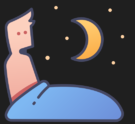

- En primer lugar, diseñe el modelo a seguir e insértelo en el cuadro de texto:

{Insertar el modelo aquí}

![Untitled diagram _ Mermaid Chart-2025-09-26-083116.png](<attachment:Untitled diagram _ Mermaid Chart-2025-09-26-083116.png>)
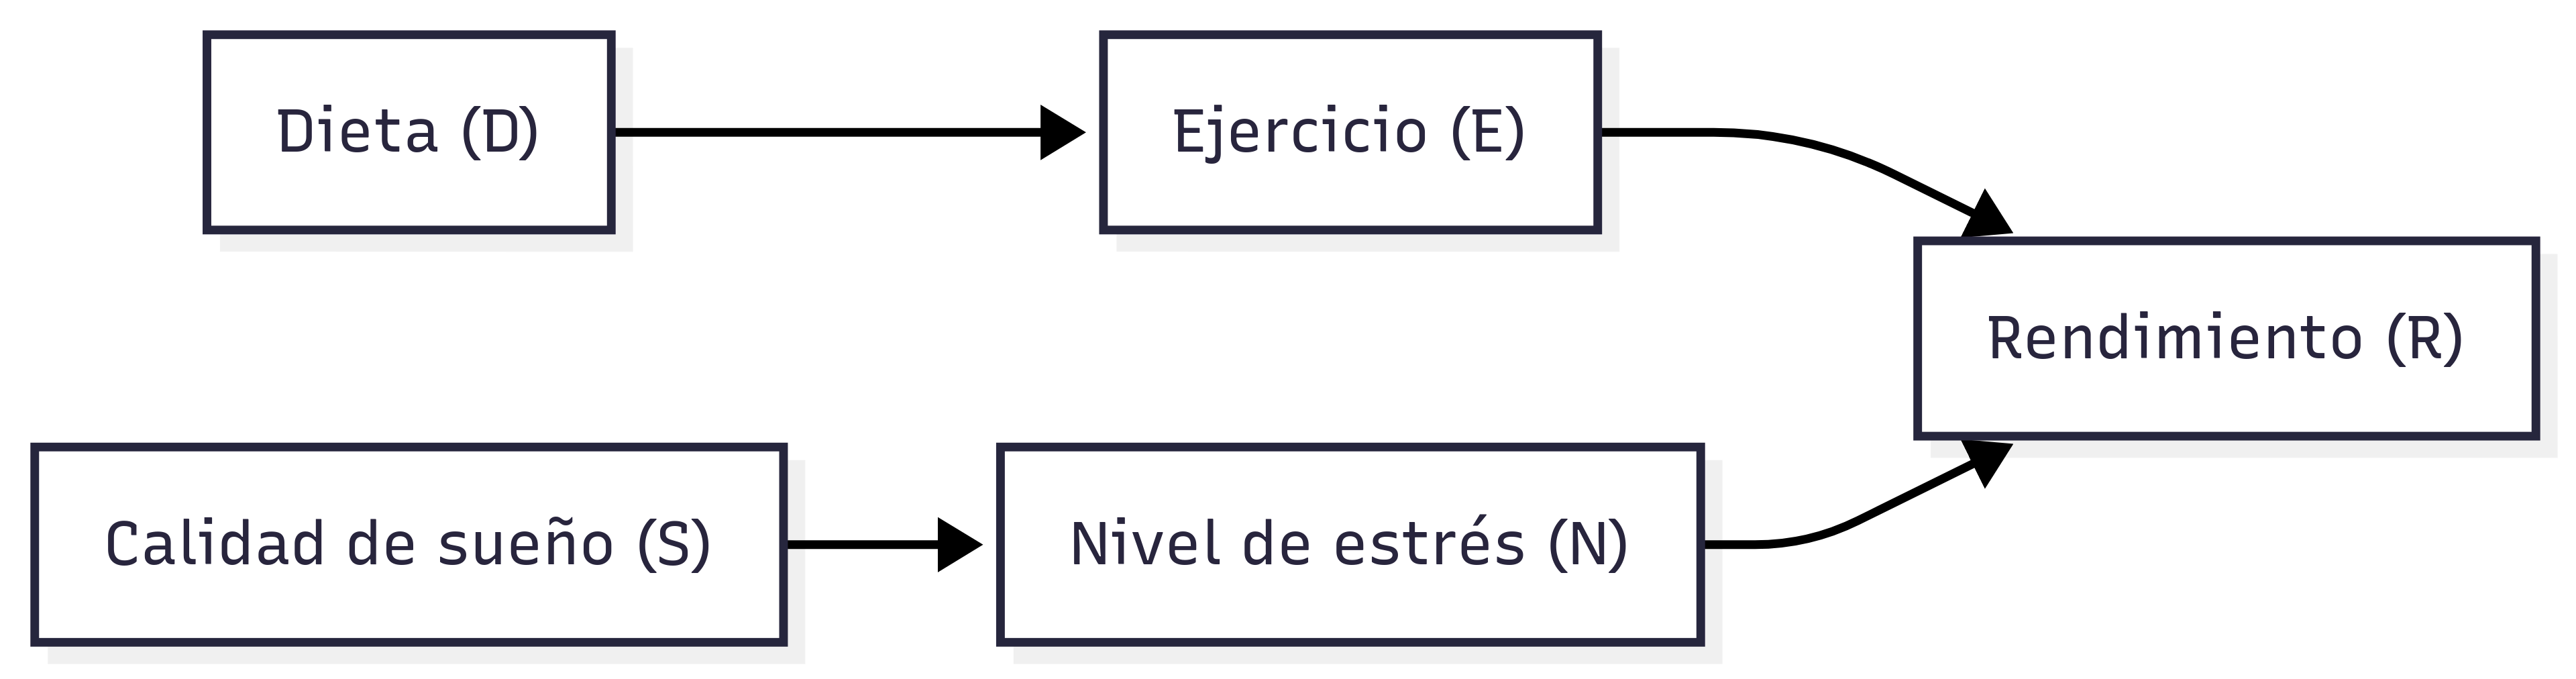

- Una vez tenga claro el modelo objeto de estudio, impleméntelo en Python considerando el siguiente impacto de la calidad del sueño sobre el estrés:

|  | C. sueño | Alta | Media | Mala |
|--|-----------------|------|-------|------|
|N. estrés| Bajo | 0.2  |  0.2  |  0.3 |
|| Medio      | 0.3  |  0.1  |  0.2 |
|| Alto       | 0.5  |  0.7  |  0.5 |

                      

In [14]:


# Definir la estructura del modelo bayesiano
# Arcos: D→E, S→N, N→R, E→R
model = BayesianNetwork([
    ("D", "E"),
    ("S", "N"),
    ("N", "R"),
    ("E", "R"),
])

# Estados (mantén siempre el mismo orden)
states_D = ["pobre", "regular", "buena"]
states_E = ["ninguno", "ligero", "regular", "intenso"]
states_S = ["mala", "media", "alta"]     # Calidad de sueño
states_N = ["bajo", "medio", "alto"]
states_R = ["bajo", "medio", "alto"]

# Definir las tablas de probabilidad condicional (TPC)
# - Probabilidad marginal de la dieta (D)
cpd_D = TabularCPD(
    variable="D", variable_card=3,
    values=[[0.2],[0.5],[0.3]],
    state_names={"D": states_D}
)

# - Probabilidad condicional del ejercicio (E) dada la dieta (D)
cpd_E_dado_D = TabularCPD(
    variable="E", variable_card=4,
    values=[
        [0.5, 0.3, 0.2],  # E=ninguno
        [0.3, 0.5, 0.2],  # E=ligero
        [0.2, 0.2, 0.5],  # E=regular
        [0.0, 0.0, 0.1],  # E=intenso
    ],
    evidence=["D"], evidence_card=[3],
    state_names={"E": states_E, "D": states_D}
)

# - Probabilidad marginal de la calidad de sueño (S)
cpd_S = TabularCPD(
    variable="S", variable_card=3,
    values=[[0.7],[0.1],[0.2]],
    state_names={"S": states_S}
)

# - Probabilidad condicional del nivel de estrés (N) dada la calidad de sueño (S)
cpd_N_dado_S = TabularCPD(
    variable="N", variable_card=3,
    values=[
        [0.3, 0.2, 0.2],  # N=bajo  | S=[mala, media, alta]
        [0.2, 0.1, 0.3],  # N=medio
        [0.5, 0.7, 0.5],  # N=alto
    ],
    evidence=["S"], evidence_card=[3],
    state_names={"N": states_N, "S": states_S}
)

# - Probabilidad condicional del rendimiento académico (R) dada el ejercicio (E) y el nivel de estrés (N)
cpd_R_dado_E_N = TabularCPD(
    variable="R", variable_card=3,
    values=[
        # R=bajo
        [0.6, 0.5, 0.2,  0.1, 0.4, 0.4,  0.2, 0.1, 0.3,  0.3, 0.3, 0.1],
        # R=medio
        [0.3, 0.3, 0.5,  0.4, 0.3, 0.3,  0.5, 0.4, 0.4,  0.4, 0.4, 0.3],
        # R=alto
        [0.1, 0.2, 0.3,  0.5, 0.3, 0.3,  0.3, 0.5, 0.3,  0.3, 0.3, 0.6],
    ],
    evidence=["E","N"], evidence_card=[4,3],
    state_names={"R": states_R, "E": states_E, "N": states_N}
)

# Añadir las TPC al modelo
model.add_cpds(cpd_D, cpd_E_dado_D, cpd_S, cpd_N_dado_S, cpd_R_dado_E_N)

# Validar el modelo
assert model.check_model()
print("✅ Modelo válido (Caso 2: S→N, N→R y E→R).")

# Crear un objeto de inferencia
infer = VariableElimination(model)
print("🔎 Inferencia lista.")

✅ Modelo válido (Caso 2: S→N, N→R y E→R).
🔎 Inferencia lista.


Para comprobar que funciona, calcule la probabilidad de tener un rendimiento académico alto dados los siguientes datos:
- Buena dieta.
- Calidad de sueño alta.

In [15]:
# Mostrar las probabilidades para el rendimiento alto, medio y bajo según las condiciones dadas.
query_result = infer.query(
    variables=["R"],
    evidence={"D": "buena", "S": "alta"}
)
print(query_result)

# Acceso directo al valor de "alto" (orden de estados R=['bajo','medio','alto'])
print("P(R=alto | D=buena, S=alta) =", float(query_result.values[2]))

+----------+----------+
| R        |   phi(R) |
+==========+==========+
| R(bajo)  |   0.2720 |
+----------+----------+
| R(medio) |   0.3890 |
+----------+----------+
| R(alto)  |   0.3390 |
+----------+----------+
P(R=alto | D=buena, S=alta) = 0.339
